# Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from numpy import nan
from numpy import mean
from numpy import std
import numpy as np
import seaborn as sns

# Central West

In [55]:
df1 = pd.read_csv('./dataset/central_west.csv',header=None)

C:\Users\chris\AppData\Local\Temp\ipykernel_22284\4064031873.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('./dataset/central_west.csv',header=None)


## Mendrop Kolom Index, Date, Hour, Region, State, Station, dan Station Code

Menurut saya kolom index, date, dan hour tidak perlu ada dalam dataframe dan karena kolom region, state, station, dan station code bentuknya adalah string maka saya akan hapus kolom-kolom ini dari dataframe

In [57]:
delCols = [0,1,2,20,21,22,23]
df1.drop(delCols, axis=1, inplace=True)

In [58]:
df1 = df1.iloc[1: , :]

## Menampilkan Dataframe central west

In [22]:
display(df1.head())

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26
1,0.0,899.6,900.0,899.6,3391,26.5,17.7,26.5,24.4,18.3,16.5,65,57,59,39,9.6,3.9,-16.01111111,-47.5575,1043.0
2,0.0,899.2,899.6,899.2,3306,26.6,16.7,26.7,25.4,17.9,16.0,60,52,54,55,8.3,3.4,-16.01111111,-47.5575,1043.0
3,0.0,898.6,899.2,898.6,3167,27.3,15.8,27.6,25.9,17.1,14.5,56,45,49,62,8.3,3.6,-16.01111111,-47.5575,1043.0
4,0.0,897.7,898.6,897.7,3279,27.5,12.9,28.5,26.6,17.6,12.9,53,41,41,43,6.7,3.1,-16.01111111,-47.5575,1043.0
5,0.0,897.0,897.7,897.0,2753,27.5,13.7,28.9,27.4,15.6,12.4,45,39,43,98,6.4,3.5,-16.01111111,-47.5575,1043.0


## Mencari dan Membuang Single Values

In [23]:
countsCentralWest = df1.nunique()
singleValCentralWest = [i for i,v in enumerate(countsCentralWest) if v == 1]
print(f'Single Values Central West Dataset = {singleValCentralWest}')

In [24]:
print(countsCentralWest)

Tidak ada single values pada dataset central west

## Menggunakan variance threshold dengan berbagai variasi nilai

In [59]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
print(X.shape, y.shape)

(11427120, 19) (11427120,)


In [26]:
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
print(thresholds)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
print(results)
pyplot.plot(thresholds, results)
pyplot.show()

In [60]:
results = [19]
results = list(set(results))
df1.drop(results, axis=1, inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_22284\3452757296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(results, axis=1, inplace=True)


## Mendeteksi dan Membuang Duplikasi Data

In [28]:
dups = df1.duplicated()
# list all duplicate rows
display(df1[dups])

In [61]:
rowBefore,colBefore = df1.shape
print(f'Shape sebelum penghapusan data duplikasi = {rowBefore} , {colBefore}')

Shape sebelum penghapusan data duplikasi = 11427120 , 19


In [62]:
df1.drop_duplicates(inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_22284\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [63]:
rowAfter,colAfter = df1.shape
print(f'Shape setelah penghapusan data duplikasi = {rowAfter} , {colAfter}')

Shape setelah penghapusan data duplikasi = 9958796 , 19


## Mengubah seluruh data type menjadi float yang tadinya adalah object

In [64]:
columns = df1.columns.tolist()

In [65]:
for cols in columns:
    df1[cols] = df1[cols].astype(float)

C:\Users\chris\AppData\Local\Temp\ipykernel_22284\4081516463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols] = df1[cols].astype(float)


## Mencari dan membuat outlier

In [20]:
def outlier_treatment(datacolumn):
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

def change_outlier_to_nan(df):
    for cols in df.columns:
        lowerbound,upperbound = outlier_treatment(df[cols])
        outliers = list(df[ (df[cols] > upperbound) | (df[cols] < lowerbound) ].index)
        for out in outliers:
            df.loc[out,cols] = np.nan
    return df

In [67]:
df1 = change_outlier_to_nan(df1)

C:\Users\chris\AppData\Local\Temp\ipykernel_22284\3225307127.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[out,cols] = np.nan


In [123]:
print(df1.isnull().sum().sum())

4147686


In [124]:
display(df1)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,24,25,26
1,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,26.5,24.4,18.3,16.5,65.0,57.0,59.0,39.0,9.6,-16.011111,-47.5575,1043.0
2,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,26.7,25.4,17.9,16.0,60.0,52.0,54.0,55.0,8.3,-16.011111,-47.5575,1043.0
3,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,27.6,25.9,17.1,14.5,56.0,45.0,49.0,62.0,8.3,-16.011111,-47.5575,1043.0
4,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,28.5,26.6,17.6,12.9,53.0,41.0,41.0,43.0,6.7,-16.011111,-47.5575,1043.0
5,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,28.9,27.4,15.6,12.4,45.0,39.0,43.0,98.0,6.4,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427116,0.0,898.8,898.8,898.5,29.0,18.4,15.8,18.4,17.6,16.2,15.6,91.0,84.0,85.0,72.0,3.5,-16.011111,-47.5575,1043.0
11427117,0.0,899.4,899.4,898.8,557.0,20.3,16.9,20.3,18.4,17.0,15.8,85.0,80.0,81.0,69.0,3.5,-16.011111,-47.5575,1043.0
11427118,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,21.9,20.3,17.3,16.4,81.0,72.0,72.0,83.0,7.6,-16.011111,-47.5575,1043.0
11427119,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,23.3,21.7,17.7,16.4,74.0,68.0,70.0,59.0,7.6,-16.011111,-47.5575,1043.0


## Imputasi dengan Simple Imputer

In [133]:
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
meanImputer = meanImputer.fit_transform(df1)

In [126]:
meanImputerData = pd.DataFrame(meanImputer)

In [127]:
print(meanImputerData.isnull().sum().sum())

0


In [134]:
display(meanImputerData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,26.5,24.4,18.3,16.5,65.0,57.0,59.0,39.0,9.6,-16.011111,-47.5575,1043.0
1,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,26.7,25.4,17.9,16.0,60.0,52.0,54.0,55.0,8.3,-16.011111,-47.5575,1043.0
2,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,27.6,25.9,17.1,14.5,56.0,45.0,49.0,62.0,8.3,-16.011111,-47.5575,1043.0
3,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,28.5,26.6,17.6,12.9,53.0,41.0,41.0,43.0,6.7,-16.011111,-47.5575,1043.0
4,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,28.9,27.4,15.6,12.4,45.0,39.0,43.0,98.0,6.4,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958791,0.0,898.8,898.8,898.5,29.0,18.4,15.8,18.4,17.6,16.2,15.6,91.0,84.0,85.0,72.0,3.5,-16.011111,-47.5575,1043.0
9958792,0.0,899.4,899.4,898.8,557.0,20.3,16.9,20.3,18.4,17.0,15.8,85.0,80.0,81.0,69.0,3.5,-16.011111,-47.5575,1043.0
9958793,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,21.9,20.3,17.3,16.4,81.0,72.0,72.0,83.0,7.6,-16.011111,-47.5575,1043.0
9958794,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,23.3,21.7,17.7,16.4,74.0,68.0,70.0,59.0,7.6,-16.011111,-47.5575,1043.0


In [162]:
medianImputer = SimpleImputer(strategy='median')
medianImputerData = medianImputer.fit_transform(df1)

In [163]:
medianImputerData = pd.DataFrame(medianImputerData)
display(medianImputerData)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,899.6,900.0,899.6,3391.0,26.5,17.7,26.5,24.4,18.3,16.5,65.0,57.0,59.0,39.0,9.6,-16.011111,-47.5575,1043.0
1,0.0,899.2,899.6,899.2,3306.0,26.6,16.7,26.7,25.4,17.9,16.0,60.0,52.0,54.0,55.0,8.3,-16.011111,-47.5575,1043.0
2,0.0,898.6,899.2,898.6,3167.0,27.3,15.8,27.6,25.9,17.1,14.5,56.0,45.0,49.0,62.0,8.3,-16.011111,-47.5575,1043.0
3,0.0,897.7,898.6,897.7,3279.0,27.5,12.9,28.5,26.6,17.6,12.9,53.0,41.0,41.0,43.0,6.7,-16.011111,-47.5575,1043.0
4,0.0,897.0,897.7,897.0,2753.0,27.5,13.7,28.9,27.4,15.6,12.4,45.0,39.0,43.0,98.0,6.4,-16.011111,-47.5575,1043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958791,0.0,898.8,898.8,898.5,29.0,18.4,15.8,18.4,17.6,16.2,15.6,91.0,84.0,85.0,72.0,3.5,-16.011111,-47.5575,1043.0
9958792,0.0,899.4,899.4,898.8,557.0,20.3,16.9,20.3,18.4,17.0,15.8,85.0,80.0,81.0,69.0,3.5,-16.011111,-47.5575,1043.0
9958793,0.0,899.7,899.7,899.4,1441.0,21.8,16.6,21.9,20.3,17.3,16.4,81.0,72.0,72.0,83.0,7.6,-16.011111,-47.5575,1043.0
9958794,0.0,899.8,899.8,899.7,2334.0,23.2,17.3,23.3,21.7,17.7,16.4,74.0,68.0,70.0,59.0,7.6,-16.011111,-47.5575,1043.0


In [88]:
mostFrequentImputer = SimpleImputer(strategy='most_frequent')
mostFrequentImputerData = mostFrequentImputer.fit_transform(df1)

In [89]:
mostFrequentImputerData = pd.DataFrame(mostFrequentImputerData)

In [137]:
constantImputer = SimpleImputer(strategy='constant')
constantImputerData = constantImputer.fit_transform(df1)

In [141]:
constantImputerData = pd.DataFrame(constantImputerData)

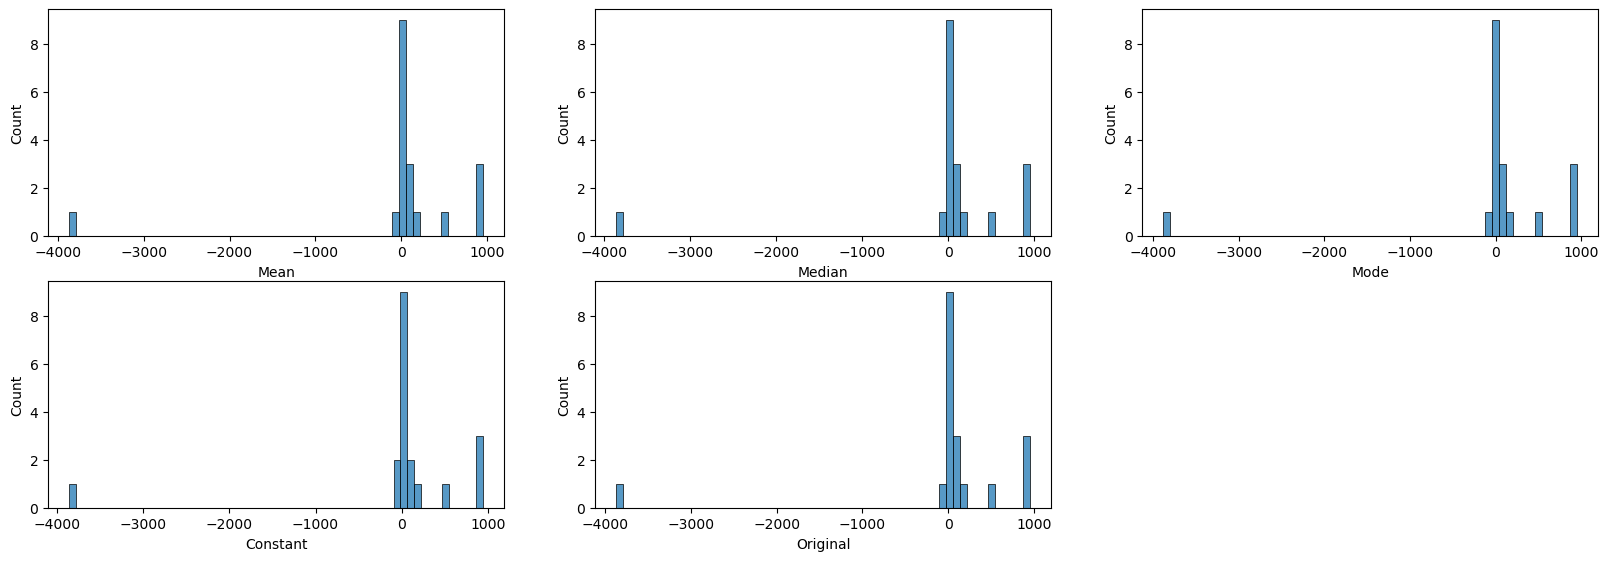

In [169]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(331)
ax1 = sns.histplot(meanImputerData.mean())
ax1.set(xlabel='Mean')
plt.subplot(332)
ax2 = sns.histplot(medianImputerData.mean())
ax2.set(xlabel='Median')
plt.subplot(333)
ax3 = sns.histplot(mostFrequentImputerData.mean())
ax3.set(xlabel='Mode')
plt.subplot(334)
ax4 = sns.histplot(constantImputerData.mean())
ax4.set(xlabel='Constant')
plt.subplot(335)
ax5 = sns.histplot(df1.mean())
ax5.set(xlabel='Original')
plt.plot()
plt.show()

# North Dataset

Metode Dibawah ini sama persis seperti step - step diatas

In [4]:
# Membuat Dataframe
df2 = pd.read_csv('./dataset/north.csv',header=None)

C:\Users\chris\AppData\Local\Temp\ipykernel_15448\4268168000.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./dataset/north.csv',header=None)


In [5]:
# Menampilkan head dari df2
display(df2.head())

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
1,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.10333333,-60.01638888,61.25
2,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.10333333,-60.01638888,61.25
3,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.10333333,-60.01638888,61.25
4,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.10333333,-60.01638888,61.25


In [6]:
delCols = [0,1,2,20,21,22,23]
df2.drop(delCols, axis=1, inplace=True)

In [7]:
# Membuang baris pertama karena isinya hanyalah keterangan kolom
df2 = df2.iloc[1: , :]
display(df2)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-3.10333333,-60.01638888,61.25
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-3.10333333,-60.01638888,61.25
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-3.10333333,-60.01638888,61.25
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-3.10333333,-60.01638888,61.25
5,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-3.10333333,-60.01638888,61.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392316,6.0,997.6,997.6,996.4,128,22.7,21.2,28.2,21.8,22.6,19.2,92,68,91,67,13.0,0.7,-5.366447,-49.051166,116.58
8392317,0.0,996.2,997.6,996.1,24,23.3,21.6,23.5,22.7,22.1,21.2,93,91,91,148,3.0,1.7,-5.366447,-49.051166,116.58
8392318,0.0,996.5,996.5,996.1,14,23.1,21.8,23.5,23.1,21.9,21.5,93,90,93,81,5.7,0.8,-5.366447,-49.051166,116.58
8392319,0.2,997.2,997.3,996.5,-9999,23.0,21.9,23.2,22.9,22.1,21.8,94,93,94,318,1.7,0.7,-5.366447,-49.051166,116.58


In [8]:
countsNorth = df1.nunique()
singleValNorth = [i for i,v in enumerate(countsNorth) if v == 1]
print(f'Single Values Central West Dataset = {singleValNorth}')

In [9]:
print(countsNorth)

Tidak ada single values pada dataset north

In [10]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
print(X.shape, y.shape)

(8392320, 19) (8392320,)


In [11]:
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
print(thresholds)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
print(results)
pyplot.plot(thresholds, results)
pyplot.show()

In [12]:
# Membuang kolom yang memiliki variance threshold rendah
results = [19]
results = list(set(results))
df2.drop(results, axis=1, inplace=True)

In [13]:
# membuang duplikasi data dalam dataset
rowBefore,colBefore = df2.shape
print(f'Shape sebelum penghapusan data duplikasi = {rowBefore} , {colBefore}')

Shape sebelum penghapusan data duplikasi = 8392320 , 19


In [14]:
df2.drop_duplicates(inplace=True)

In [15]:
rowAfter,colAfter = df2.shape
print(f'Shape setelah penghapusan data duplikasi = {rowAfter} , {colAfter}')

Shape setelah penghapusan data duplikasi = 6844828 , 19


In [16]:
columns = df2.columns.tolist()

In [17]:
for cols in columns:
    df2[cols] = df2[cols].astype(float)

In [18]:
df2.isnull().sum().sum()

0

In [21]:
df2 = change_outlier_to_nan(df2)

In [22]:
df2.isnull().sum().sum()

6459608

In [23]:
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
meanImputer = meanImputer.fit_transform(df2)
meanImputerData = pd.DataFrame(meanImputer)
print(meanImputerData.isnull().sum().sum())

0


In [24]:
medianImputer = SimpleImputer(strategy='median')
medianImputerData = medianImputer.fit_transform(df2)
medianImputerData = pd.DataFrame(medianImputerData)
print(medianImputerData.isnull().sum().sum())
display(medianImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,998.6,998.9,998.2,-9999.0,25.6,22.3,26.2,25.1,22.8,21.9,85.0,78.0,82.0,128.0,3.1,-3.103333,-60.016389,61.25
1,0.0,1002.6,1002.8,1002.6,386.0,29.4,23.1,29.8,29.4,23.3,22.6,69.0,65.0,69.0,96.0,2.9,-3.103333,-60.016389,61.25
2,0.0,1002.8,1002.8,1002.5,184.0,26.9,24.1,29.5,26.9,24.3,22.8,85.0,68.0,84.0,184.0,1.9,-3.103333,-60.016389,61.25
3,0.0,1003.8,1003.8,1002.8,-9999.0,25.5,23.9,27.3,25.5,24.1,23.1,91.0,78.0,91.0,300.0,1.5,-3.103333,-60.016389,61.25
4,0.0,1004.6,1004.6,1003.9,-9999.0,25.0,23.9,25.5,24.9,24.1,23.7,94.0,91.0,93.0,3.0,0.8,-3.103333,-60.016389,61.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844823,0.0,997.6,997.6,996.4,128.0,22.7,21.2,28.2,21.8,22.6,19.2,92.0,68.0,91.0,67.0,3.1,-5.366447,-49.051166,116.58
6844824,0.0,996.2,997.6,996.1,24.0,23.3,21.6,23.5,22.7,22.1,21.2,93.0,91.0,91.0,148.0,3.0,-5.366447,-49.051166,116.58
6844825,0.0,996.5,996.5,996.1,14.0,23.1,21.8,23.5,23.1,21.9,21.5,93.0,90.0,93.0,81.0,5.7,-5.366447,-49.051166,116.58
6844826,0.0,997.2,997.3,996.5,-9999.0,23.0,21.9,23.2,22.9,22.1,21.8,94.0,93.0,94.0,318.0,1.7,-5.366447,-49.051166,116.58


In [25]:
mostFrequentImputer = SimpleImputer(strategy='most_frequent')
mostFrequentImputerData = mostFrequentImputer.fit_transform(df2)
mostFrequentImputerData = pd.DataFrame(mostFrequentImputerData)
print(mostFrequentImputerData.isnull().sum().sum())
display(mostFrequentImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1007.2,1007.2,1006.6,-9999.0,23.9,22.7,24.2,23.9,23.0,22.4,94.0,94.0,94.0,236.0,0.0,-3.103333,-60.016389,61.25
1,0.0,1002.6,1002.8,1002.6,386.0,29.4,23.1,29.8,29.4,23.3,22.6,69.0,65.0,69.0,96.0,2.9,-3.103333,-60.016389,61.25
2,0.0,1002.8,1002.8,1002.5,184.0,26.9,24.1,29.5,26.9,24.3,22.8,85.0,68.0,84.0,184.0,1.9,-3.103333,-60.016389,61.25
3,0.0,1003.8,1003.8,1002.8,-9999.0,25.5,23.9,27.3,25.5,24.1,23.1,91.0,78.0,91.0,300.0,1.5,-3.103333,-60.016389,61.25
4,0.0,1004.6,1004.6,1003.9,-9999.0,25.0,23.9,25.5,24.9,24.1,23.7,94.0,91.0,93.0,3.0,0.8,-3.103333,-60.016389,61.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844823,0.0,997.6,997.6,996.4,128.0,22.7,21.2,28.2,21.8,22.6,19.2,92.0,68.0,91.0,67.0,0.0,-5.366447,-49.051166,116.58
6844824,0.0,996.2,997.6,996.1,24.0,23.3,21.6,23.5,22.7,22.1,21.2,93.0,91.0,91.0,148.0,3.0,-5.366447,-49.051166,116.58
6844825,0.0,996.5,996.5,996.1,14.0,23.1,21.8,23.5,23.1,21.9,21.5,93.0,90.0,93.0,81.0,5.7,-5.366447,-49.051166,116.58
6844826,0.0,997.2,997.3,996.5,-9999.0,23.0,21.9,23.2,22.9,22.1,21.8,94.0,93.0,94.0,318.0,1.7,-5.366447,-49.051166,116.58


In [26]:
constantImputer = SimpleImputer(strategy='constant')
constantImputerData = constantImputer.fit_transform(df2)
constantImputerData = pd.DataFrame(constantImputerData)
print(constantImputerData.isnull().sum().sum())
display(constantImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.103333,-60.016389,61.25
1,0.0,1002.6,1002.8,1002.6,386.0,29.4,23.1,29.8,29.4,23.3,22.6,69.0,65.0,69.0,96.0,2.9,-3.103333,-60.016389,61.25
2,0.0,1002.8,1002.8,1002.5,184.0,26.9,24.1,29.5,26.9,24.3,22.8,85.0,68.0,84.0,184.0,1.9,-3.103333,-60.016389,61.25
3,0.0,1003.8,1003.8,1002.8,-9999.0,25.5,23.9,27.3,25.5,24.1,23.1,91.0,78.0,91.0,300.0,1.5,-3.103333,-60.016389,61.25
4,0.0,1004.6,1004.6,1003.9,-9999.0,25.0,23.9,25.5,24.9,24.1,23.7,94.0,91.0,93.0,3.0,0.8,-3.103333,-60.016389,61.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844823,0.0,997.6,997.6,996.4,128.0,22.7,21.2,28.2,21.8,22.6,19.2,92.0,68.0,91.0,67.0,0.0,-5.366447,-49.051166,116.58
6844824,0.0,996.2,997.6,996.1,24.0,23.3,21.6,23.5,22.7,22.1,21.2,93.0,91.0,91.0,148.0,3.0,-5.366447,-49.051166,116.58
6844825,0.0,996.5,996.5,996.1,14.0,23.1,21.8,23.5,23.1,21.9,21.5,93.0,90.0,93.0,81.0,5.7,-5.366447,-49.051166,116.58
6844826,0.0,997.2,997.3,996.5,-9999.0,23.0,21.9,23.2,22.9,22.1,21.8,94.0,93.0,94.0,318.0,1.7,-5.366447,-49.051166,116.58


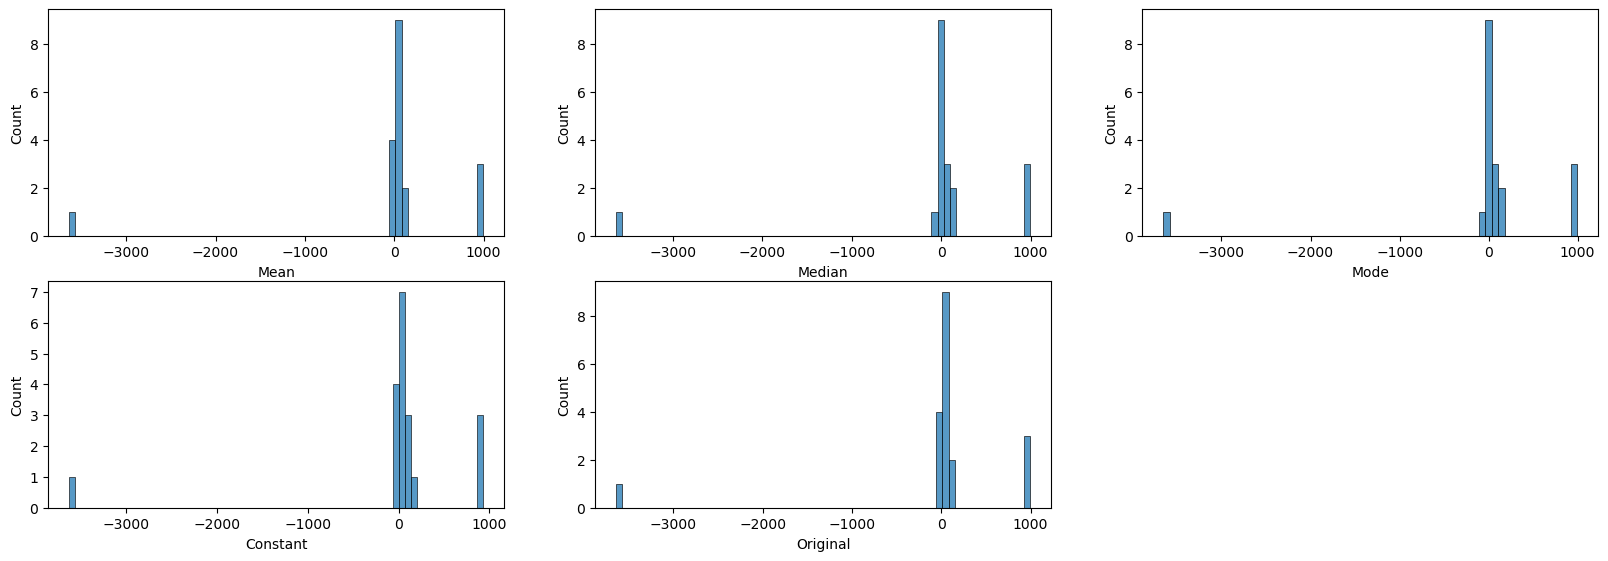

In [27]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(331)
ax1 = sns.histplot(meanImputerData.mean())
ax1.set(xlabel='Mean')
plt.subplot(332)
ax2 = sns.histplot(medianImputerData.mean())
ax2.set(xlabel='Median')
plt.subplot(333)
ax3 = sns.histplot(mostFrequentImputerData.mean())
ax3.set(xlabel='Mode')
plt.subplot(334)
ax4 = sns.histplot(constantImputerData.mean())
ax4.set(xlabel='Constant')
plt.subplot(335)
ax5 = sns.histplot(df2.mean())
ax5.set(xlabel='Original')
plt.plot()
plt.show()

# NorthEast Dataset

In [29]:
# Membuat Dataframe
df3 = pd.read_csv('./dataset/northeast.csv',header=None)

C:\Users\chris\AppData\Local\Temp\ipykernel_15448\465253421.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('./dataset/northeast.csv',header=None)


In [30]:
# Menampilkan head dari df3
display(df3.head())

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
1,0,2000-05-13,00:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,BA,SALVADOR,A401,-13.01666666,-38.51666666,51.41
2,1,2000-05-13,01:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,BA,SALVADOR,A401,-13.01666666,-38.51666666,51.41
3,2,2000-05-13,02:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,BA,SALVADOR,A401,-13.01666666,-38.51666666,51.41
4,3,2000-05-13,03:00,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,NE,BA,SALVADOR,A401,-13.01666666,-38.51666666,51.41


In [31]:
delCols = [0,1,2,20,21,22,23]
df3.drop(delCols, axis=1, inplace=True)

In [32]:
# Membuang baris pertama karena isinya hanyalah keterangan kolom
df3 = df3.iloc[1: , :]
display(df3)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26
1,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-13.01666666,-38.51666666,51.41
2,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-13.01666666,-38.51666666,51.41
3,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-13.01666666,-38.51666666,51.41
4,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-13.01666666,-38.51666666,51.41
5,-9999.0,-9999,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-13.01666666,-38.51666666,51.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16260932,0.0,1003,1003.2,1002.5,3327,30.8,23.9,31.2,29.1,24.6,22.8,70,65,67,91,6.5,3.4,-5.837222,-35.208056,47.46
16260933,0.0,1002,1002.5,1001.8,2954,29.0,24.0,31.9,28.2,25.2,23.1,76,66,75,134,8.1,4.0,-5.837222,-35.208056,47.46
16260934,0.0,1001,1001.9,1001.0,1774,28.4,24.0,29.2,28.0,24.6,23.4,78,74,77,127,8.7,4.3,-5.837222,-35.208056,47.46
16260935,0.0,1001,1001.1,1000.9,782,26.7,23.5,28.7,26.6,24.3,22.3,84,72,83,135,8.9,4.9,-5.837222,-35.208056,47.46


In [34]:
countsNorth = df3.nunique()
singleValNorthEast = [i for i,v in enumerate(countsNorth) if v == 1]
print(f'Single Values Central West Dataset = {singleValNorthEast}')

Single Values Central West Dataset = []


In [35]:
print(singleValNorthEast)

[]


In [36]:
X = df3.iloc[:, :-1]
y = df3.iloc[:, -1]
print(X.shape, y.shape)

(16260936, 19) (16260936,)


In [38]:
# Membuang kolom yang memiliki variance threshold rendah
results = [19]
results = list(set(results))
df3.drop(results, axis=1, inplace=True)

In [39]:
# membuang duplikasi data dalam dataset
rowBefore,colBefore = df3.shape
print(f'Shape sebelum penghapusan data duplikasi = {rowBefore} , {colBefore}')
df3.drop_duplicates(inplace=True)
rowAfter,colAfter = df3.shape
print(f'Shape setelah penghapusan data duplikasi = {rowAfter} , {colAfter}')

Shape sebelum penghapusan data duplikasi = 16260936 , 19
Shape setelah penghapusan data duplikasi = 14446257 , 19


In [40]:
columns = df3.columns.tolist()

In [41]:
for cols in columns:
    df3[cols] = df3[cols].astype(float)

In [42]:
df3.isnull().sum().sum()

0

In [43]:
df3 = change_outlier_to_nan(df3)

In [44]:
df3.isnull().sum().sum()

6889461

In [45]:
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
meanImputer = meanImputer.fit_transform(df3)
meanImputerData = pd.DataFrame(meanImputer)
print(meanImputerData.isnull().sum().sum())

0


In [46]:
medianImputer = SimpleImputer(strategy='median')
medianImputerData = medianImputer.fit_transform(df3)
medianImputerData = pd.DataFrame(medianImputerData)
print(medianImputerData.isnull().sum().sum())
display(medianImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,984.0,984.6,984.0,-9999.0,25.5,19.5,26.1,24.9,20.0,19.0,75.0,68.0,72.0,115.0,5.6,-13.016667,-38.516667,51.41
1,0.0,984.0,1008.1,1007.7,919.0,27.2,22.8,28.7,26.6,23.5,22.1,81.0,68.0,77.0,128.0,3.7,-13.016667,-38.516667,51.41
2,0.0,984.0,1007.7,1006.9,1449.0,28.8,23.3,28.8,26.7,23.6,22.4,78.0,72.0,72.0,90.0,4.9,-13.016667,-38.516667,51.41
3,0.0,984.0,1006.8,1005.7,3323.0,29.5,23.3,29.7,28.9,24.3,23.2,75.0,69.0,69.0,113.0,6.3,-13.016667,-38.516667,51.41
4,0.0,984.0,1005.7,1004.9,2373.0,29.0,22.9,29.3,28.2,23.7,22.8,75.0,69.0,69.0,88.0,7.3,-13.016667,-38.516667,51.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446252,0.0,1003.0,1003.2,1002.5,3327.0,30.8,23.9,31.2,29.1,24.6,22.8,70.0,65.0,67.0,91.0,6.5,-5.837222,-35.208056,47.46
14446253,0.0,1002.0,1002.5,1001.8,2954.0,29.0,24.0,31.9,28.2,25.2,23.1,76.0,66.0,75.0,134.0,8.1,-5.837222,-35.208056,47.46
14446254,0.0,1001.0,1001.9,1001.0,1774.0,28.4,24.0,29.2,28.0,24.6,23.4,78.0,74.0,77.0,127.0,8.7,-5.837222,-35.208056,47.46
14446255,0.0,1001.0,1001.1,1000.9,782.0,26.7,23.5,28.7,26.6,24.3,22.3,84.0,72.0,83.0,135.0,8.9,-5.837222,-35.208056,47.46


In [47]:
mostFrequentImputer = SimpleImputer(strategy='most_frequent')
mostFrequentImputerData = mostFrequentImputer.fit_transform(df3)
mostFrequentImputerData = pd.DataFrame(mostFrequentImputerData)
print(mostFrequentImputerData.isnull().sum().sum())
display(mostFrequentImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1010.0,1010.2,1009.3,-9999.0,24.0,21.1,24.2,23.9,21.3,20.8,93.0,93.0,93.0,118.0,0.0,-13.016667,-38.516667,51.41
1,0.0,1010.0,1008.1,1007.7,919.0,27.2,22.8,28.7,26.6,23.5,22.1,81.0,68.0,77.0,128.0,3.7,-13.016667,-38.516667,51.41
2,0.0,1010.0,1007.7,1006.9,1449.0,28.8,23.3,28.8,26.7,23.6,22.4,78.0,72.0,72.0,90.0,4.9,-13.016667,-38.516667,51.41
3,0.0,1010.0,1006.8,1005.7,3323.0,29.5,23.3,29.7,28.9,24.3,23.2,75.0,69.0,69.0,113.0,6.3,-13.016667,-38.516667,51.41
4,0.0,1010.0,1005.7,1004.9,2373.0,29.0,22.9,29.3,28.2,23.7,22.8,75.0,69.0,69.0,88.0,7.3,-13.016667,-38.516667,51.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446252,0.0,1003.0,1003.2,1002.5,3327.0,30.8,23.9,31.2,29.1,24.6,22.8,70.0,65.0,67.0,91.0,6.5,-5.837222,-35.208056,47.46
14446253,0.0,1002.0,1002.5,1001.8,2954.0,29.0,24.0,31.9,28.2,25.2,23.1,76.0,66.0,75.0,134.0,8.1,-5.837222,-35.208056,47.46
14446254,0.0,1001.0,1001.9,1001.0,1774.0,28.4,24.0,29.2,28.0,24.6,23.4,78.0,74.0,77.0,127.0,8.7,-5.837222,-35.208056,47.46
14446255,0.0,1001.0,1001.1,1000.9,782.0,26.7,23.5,28.7,26.6,24.3,22.3,84.0,72.0,83.0,135.0,8.9,-5.837222,-35.208056,47.46


In [48]:
constantImputer = SimpleImputer(strategy='constant')
constantImputerData = constantImputer.fit_transform(df3)
constantImputerData = pd.DataFrame(constantImputerData)
print(constantImputerData.isnull().sum().sum())
display(constantImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.016667,-38.516667,51.41
1,0.0,0.0,1008.1,1007.7,919.0,27.2,22.8,28.7,26.6,23.5,22.1,81.0,68.0,77.0,128.0,3.7,-13.016667,-38.516667,51.41
2,0.0,0.0,1007.7,1006.9,1449.0,28.8,23.3,28.8,26.7,23.6,22.4,78.0,72.0,72.0,90.0,4.9,-13.016667,-38.516667,51.41
3,0.0,0.0,1006.8,1005.7,3323.0,29.5,23.3,29.7,28.9,24.3,23.2,75.0,69.0,69.0,113.0,6.3,-13.016667,-38.516667,51.41
4,0.0,0.0,1005.7,1004.9,2373.0,29.0,22.9,29.3,28.2,23.7,22.8,75.0,69.0,69.0,88.0,7.3,-13.016667,-38.516667,51.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446252,0.0,1003.0,1003.2,1002.5,3327.0,30.8,23.9,31.2,29.1,24.6,22.8,70.0,65.0,67.0,91.0,6.5,-5.837222,-35.208056,47.46
14446253,0.0,1002.0,1002.5,1001.8,2954.0,29.0,24.0,31.9,28.2,25.2,23.1,76.0,66.0,75.0,134.0,8.1,-5.837222,-35.208056,47.46
14446254,0.0,1001.0,1001.9,1001.0,1774.0,28.4,24.0,29.2,28.0,24.6,23.4,78.0,74.0,77.0,127.0,8.7,-5.837222,-35.208056,47.46
14446255,0.0,1001.0,1001.1,1000.9,782.0,26.7,23.5,28.7,26.6,24.3,22.3,84.0,72.0,83.0,135.0,8.9,-5.837222,-35.208056,47.46


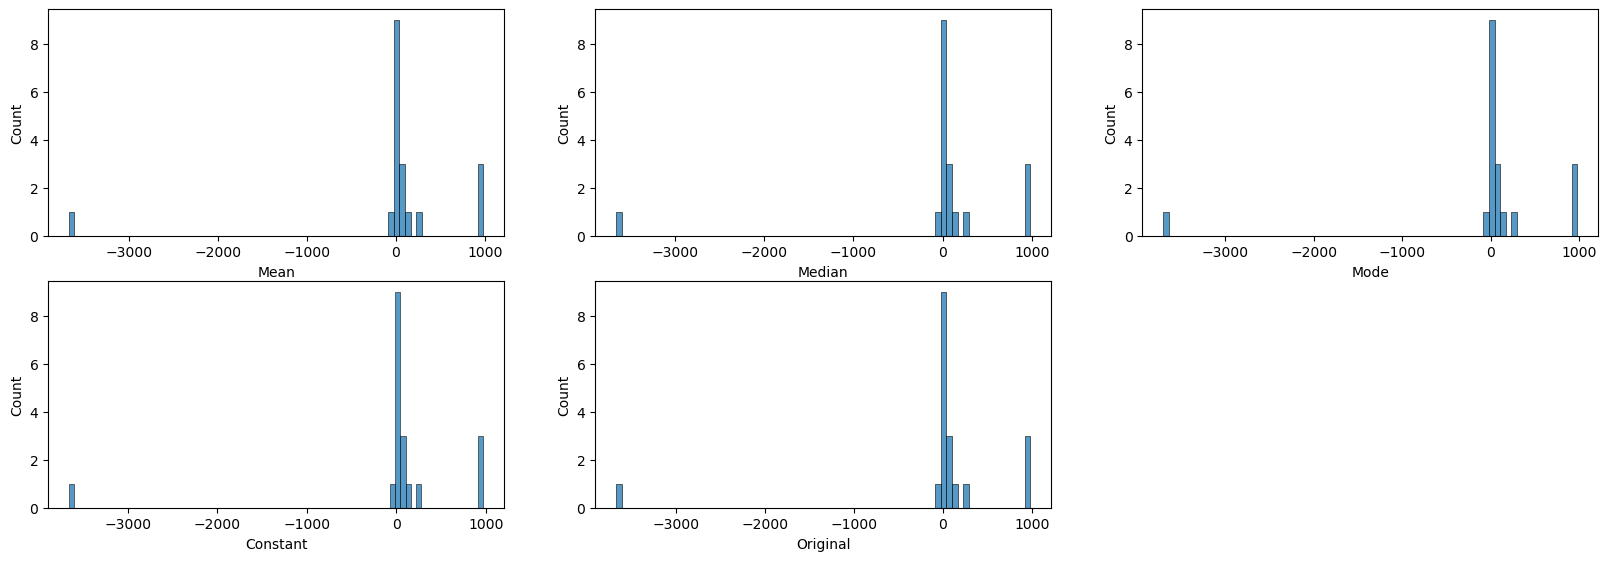

In [49]:
plt.figure(figsize=(20,10))
plt.subplot(331)
ax1 = sns.histplot(meanImputerData.mean())
ax1.set(xlabel='Mean')
plt.subplot(332)
ax2 = sns.histplot(medianImputerData.mean())
ax2.set(xlabel='Median')
plt.subplot(333)
ax3 = sns.histplot(mostFrequentImputerData.mean())
ax3.set(xlabel='Mode')
plt.subplot(334)
ax4 = sns.histplot(constantImputerData.mean())
ax4.set(xlabel='Constant')
plt.subplot(335)
ax5 = sns.histplot(df3.mean())
ax5.set(xlabel='Original')
plt.plot()
plt.show()

# South Dataset

In [62]:
df4 = pd.read_csv('./dataset/south.csv',header=None)

C:\Users\chris\AppData\Local\Temp\ipykernel_15448\3287370518.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('./dataset/south.csv',header=None)


In [63]:
# Menampilkan head dari df4
display(df4.head())

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
1,0,2000-09-22,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,S,RS,PORTO ALEGRE,A801,-30.05,-51.16666666,46.97
2,1,2000-09-22,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,S,RS,PORTO ALEGRE,A801,-30.05,-51.16666666,46.97
3,2,2000-09-22,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,S,RS,PORTO ALEGRE,A801,-30.05,-51.16666666,46.97
4,3,2000-09-22,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,S,RS,PORTO ALEGRE,A801,-30.05,-51.16666666,46.97


In [64]:
df4 = df4.iloc[1: , :]

In [65]:
delCols = [0,1,2,20,21,22,23]
df4.drop(delCols, axis=1, inplace=True)

In [66]:
X = df4.iloc[:, :-1]
y = df4.iloc[:, -1]
print(X.shape, y.shape)

(10284888, 19) (10284888,)


In [67]:
# Membuang kolom yang memiliki variance threshold rendah
results = [19]
results = list(set(results))
df4.drop(results, axis=1, inplace=True)

In [68]:
# membuang duplikasi data dalam dataset
rowBefore,colBefore = df4.shape
print(f'Shape sebelum penghapusan data duplikasi = {rowBefore} , {colBefore}')
df4.drop_duplicates(inplace=True)
rowAfter,colAfter = df4.shape
print(f'Shape setelah penghapusan data duplikasi = {rowAfter} , {colAfter}')

Shape sebelum penghapusan data duplikasi = 10284888 , 19
Shape setelah penghapusan data duplikasi = 9514398 , 19


In [69]:
columns = df4.columns.tolist()

In [70]:
for cols in columns:
    df4[cols] = df4[cols].astype(float)

In [71]:
df4.isnull().sum().sum()

0

In [72]:
df4 = change_outlier_to_nan(df4)

In [73]:
df4.isnull().sum().sum()

3618739

In [74]:
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
meanImputer = meanImputer.fit_transform(df4)
meanImputerData = pd.DataFrame(meanImputer)
print(meanImputerData.isnull().sum().sum())

0


In [75]:
medianImputer = SimpleImputer(strategy='median')
medianImputerData = medianImputer.fit_transform(df4)
medianImputerData = pd.DataFrame(medianImputerData)
print(medianImputerData.isnull().sum().sum())
display(medianImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,963.5,963.7,963.2,-9999.0,19.1,14.9,19.7,18.6,15.4,14.5,84.0,78.0,81.0,138.0,5.2,-30.050000,-51.166667,46.97
1,0.0,1013.9,1014.2,1013.2,-9999.0,15.5,14.6,15.6,15.5,14.8,14.6,95.0,94.0,94.0,231.0,4.4,-30.050000,-51.166667,46.97
2,0.0,1014.4,1014.7,1012.2,-9999.0,15.3,14.5,15.6,15.3,14.6,14.5,95.0,94.0,95.0,255.0,4.2,-30.050000,-51.166667,46.97
3,0.0,1013.8,1014.7,1013.6,-9999.0,15.1,14.1,15.4,15.1,14.5,14.1,95.0,94.0,94.0,245.0,4.1,-30.050000,-51.166667,46.97
4,0.0,1013.6,1014.0,1012.7,-9999.0,14.8,13.9,15.1,14.8,14.1,13.9,95.0,93.0,95.0,246.0,3.9,-30.050000,-51.166667,46.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514393,0.0,925.6,926.0,925.6,1646.0,20.9,6.0,21.6,20.7,6.9,5.2,40.0,36.0,38.0,27.0,8.7,-28.222381,-51.512845,833.83
9514394,0.0,925.4,925.6,925.4,898.0,20.1,6.1,20.9,20.1,6.5,4.9,40.0,36.0,40.0,32.0,7.5,-28.222381,-51.512845,833.83
9514395,0.0,925.4,925.4,925.2,163.0,18.4,6.7,20.1,18.4,6.7,6.2,47.0,40.0,47.0,27.0,5.9,-28.222381,-51.512845,833.83
9514396,0.0,925.6,925.6,925.4,-9999.0,17.5,7.2,18.5,17.5,7.2,6.7,51.0,46.0,51.0,43.0,4.4,-28.222381,-51.512845,833.83


In [76]:
mostFrequentImputer = SimpleImputer(strategy='most_frequent')
mostFrequentImputerData = mostFrequentImputer.fit_transform(df4)
mostFrequentImputerData = pd.DataFrame(mostFrequentImputerData)
print(mostFrequentImputerData.isnull().sum().sum())
display(mostFrequentImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1010.2,1010.5,1010.0,-9999.0,19.2,16.5,20.0,19.0,16.6,15.7,97.0,96.0,96.0,236.0,0.0,-30.050000,-51.166667,46.97
1,0.0,1013.9,1014.2,1013.2,-9999.0,15.5,14.6,15.6,15.5,14.8,14.6,95.0,94.0,94.0,231.0,4.4,-30.050000,-51.166667,46.97
2,0.0,1014.4,1014.7,1012.2,-9999.0,15.3,14.5,15.6,15.3,14.6,14.5,95.0,94.0,95.0,255.0,4.2,-30.050000,-51.166667,46.97
3,0.0,1013.8,1014.7,1013.6,-9999.0,15.1,14.1,15.4,15.1,14.5,14.1,95.0,94.0,94.0,245.0,4.1,-30.050000,-51.166667,46.97
4,0.0,1013.6,1014.0,1012.7,-9999.0,14.8,13.9,15.1,14.8,14.1,13.9,95.0,93.0,95.0,246.0,3.9,-30.050000,-51.166667,46.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514393,0.0,925.6,926.0,925.6,1646.0,20.9,6.0,21.6,20.7,6.9,5.2,40.0,36.0,38.0,27.0,8.7,-28.222381,-51.512845,833.83
9514394,0.0,925.4,925.6,925.4,898.0,20.1,6.1,20.9,20.1,6.5,4.9,40.0,36.0,40.0,32.0,7.5,-28.222381,-51.512845,833.83
9514395,0.0,925.4,925.4,925.2,163.0,18.4,6.7,20.1,18.4,6.7,6.2,47.0,40.0,47.0,27.0,5.9,-28.222381,-51.512845,833.83
9514396,0.0,925.6,925.6,925.4,-9999.0,17.5,7.2,18.5,17.5,7.2,6.7,51.0,46.0,51.0,43.0,4.4,-28.222381,-51.512845,833.83


In [77]:
constantImputer = SimpleImputer(strategy='constant')
constantImputerData = constantImputer.fit_transform(df4)
constantImputerData = pd.DataFrame(constantImputerData)
print(constantImputerData.isnull().sum().sum())
display(constantImputerData)

0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.050000,-51.166667,46.97
1,0.0,1013.9,1014.2,1013.2,-9999.0,15.5,14.6,15.6,15.5,14.8,14.6,95.0,94.0,94.0,231.0,4.4,-30.050000,-51.166667,46.97
2,0.0,1014.4,1014.7,1012.2,-9999.0,15.3,14.5,15.6,15.3,14.6,14.5,95.0,94.0,95.0,255.0,4.2,-30.050000,-51.166667,46.97
3,0.0,1013.8,1014.7,1013.6,-9999.0,15.1,14.1,15.4,15.1,14.5,14.1,95.0,94.0,94.0,245.0,4.1,-30.050000,-51.166667,46.97
4,0.0,1013.6,1014.0,1012.7,-9999.0,14.8,13.9,15.1,14.8,14.1,13.9,95.0,93.0,95.0,246.0,3.9,-30.050000,-51.166667,46.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514393,0.0,925.6,926.0,925.6,1646.0,20.9,6.0,21.6,20.7,6.9,5.2,40.0,36.0,38.0,27.0,8.7,-28.222381,-51.512845,833.83
9514394,0.0,925.4,925.6,925.4,898.0,20.1,6.1,20.9,20.1,6.5,4.9,40.0,36.0,40.0,32.0,7.5,-28.222381,-51.512845,833.83
9514395,0.0,925.4,925.4,925.2,163.0,18.4,6.7,20.1,18.4,6.7,6.2,47.0,40.0,47.0,27.0,5.9,-28.222381,-51.512845,833.83
9514396,0.0,925.6,925.6,925.4,-9999.0,17.5,7.2,18.5,17.5,7.2,6.7,51.0,46.0,51.0,43.0,4.4,-28.222381,-51.512845,833.83


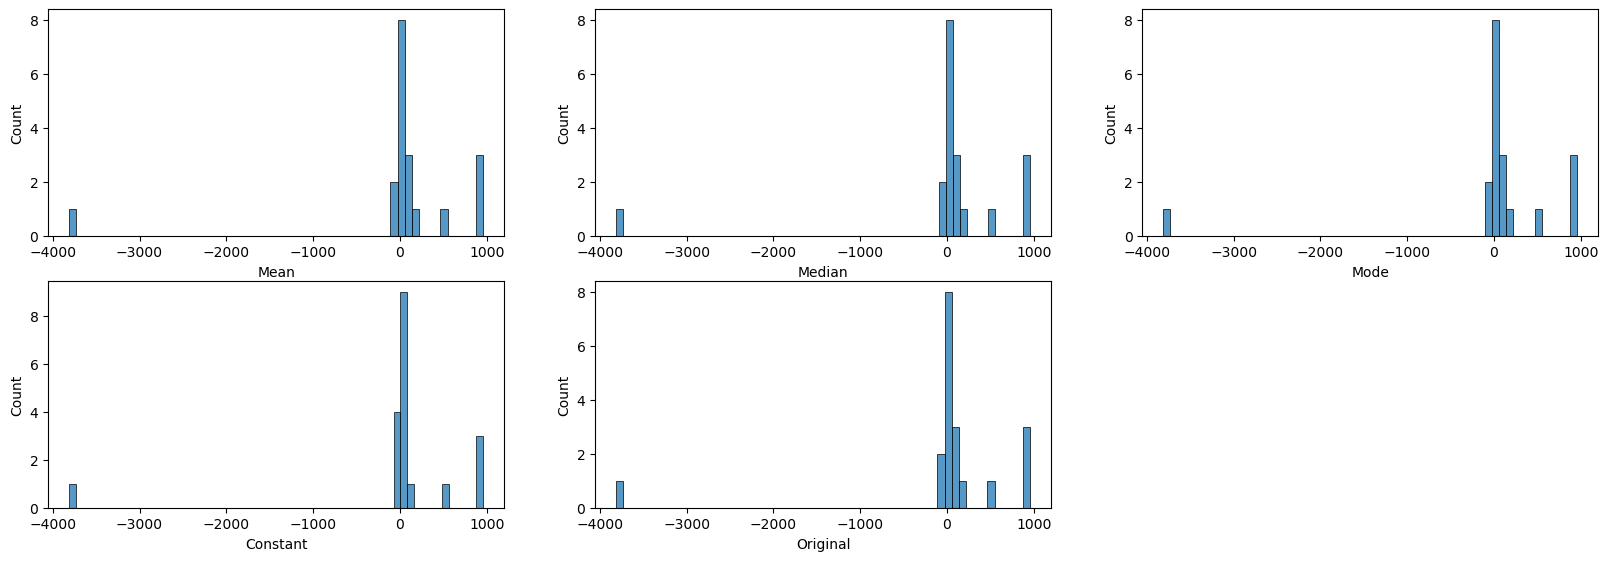

In [78]:
plt.figure(figsize=(20,10))
plt.subplot(331)
ax1 = sns.histplot(meanImputerData.mean())
ax1.set(xlabel='Mean')
plt.subplot(332)
ax2 = sns.histplot(medianImputerData.mean())
ax2.set(xlabel='Median')
plt.subplot(333)
ax3 = sns.histplot(mostFrequentImputerData.mean())
ax3.set(xlabel='Mode')
plt.subplot(334)
ax4 = sns.histplot(constantImputerData.mean())
ax4.set(xlabel='Constant')
plt.subplot(335)
ax5 = sns.histplot(df4.mean())
ax5.set(xlabel='Original')
plt.plot()
plt.show()

# SouthEast Dataset

In [79]:
df5 = pd.read_csv('./dataset/southeast.csv',header=None)

C:\Users\chris\AppData\Local\Temp\ipykernel_15448\4018981536.py:1: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('./dataset/southeast.csv',header=None)


In [80]:
# Menampilkan head dari df4
display(df5.head())

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
1,0,2000-05-07,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.68333333,33.0
2,1,2000-05-07,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.68333333,33.0
3,2,2000-05-07,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.68333333,33.0
4,3,2000-05-07,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.8,-43.68333333,33.0


In [81]:
df5 = df5.iloc[1: , :]

In [82]:
delCols = [0,1,2,20,21,22,23,19]
df5.drop(delCols, axis=1, inplace=True)

In [ ]:
X = df5.iloc[:, :-1]
y = df5.iloc[:, -1]
print(X.shape, y.shape)

In [83]:
# membuang duplikasi data dalam dataset
rowBefore,colBefore = df5.shape
print(f'Shape sebelum penghapusan data duplikasi = {rowBefore} , {colBefore}')
df5.drop_duplicates(inplace=True)
rowAfter,colAfter = df5.shape
print(f'Shape setelah penghapusan data duplikasi = {rowAfter} , {colAfter}')

Shape sebelum penghapusan data duplikasi = 15345216 , 19
Shape setelah penghapusan data duplikasi = 14329234 , 19


In [84]:
columns = df5.columns.tolist()
for cols in columns:
    df5[cols] = df5[cols].astype(float)
df5.isnull().sum().sum()

0

In [85]:
df5 = change_outlier_to_nan(df5)

In [86]:
df5.isnull().sum().sum()

5115803

In [87]:
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
meanImputer = meanImputer.fit_transform(df5)
meanImputerData = pd.DataFrame(meanImputer)
print(meanImputerData.isnull().sum().sum())

medianImputer = SimpleImputer(strategy='median')
medianImputerData = medianImputer.fit_transform(df5)
medianImputerData = pd.DataFrame(medianImputerData)
print(medianImputerData.isnull().sum().sum())
display(medianImputerData)

mostFrequentImputer = SimpleImputer(strategy='most_frequent')
mostFrequentImputerData = mostFrequentImputer.fit_transform(df5)
mostFrequentImputerData = pd.DataFrame(mostFrequentImputerData)
print(mostFrequentImputerData.isnull().sum().sum())
display(mostFrequentImputerData)

constantImputer = SimpleImputer(strategy='constant')
constantImputerData = constantImputer.fit_transform(df5)
constantImputerData = pd.DataFrame(constantImputerData)
print(constantImputerData.isnull().sum().sum())
display(constantImputerData)

0
0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,948.3,948.5,948.0,-9999.0,21.9,16.7,22.5,21.3,17.3,16.2,80.0,73.0,76.0,131.0,4.3,-22.800000,-43.683333,33.0
1,0.0,1012.5,1012.5,1012.0,219.0,22.0,18.0,22.0,20.8,18.9,17.8,87.0,77.0,78.0,30.0,1.4,-22.800000,-43.683333,33.0
2,0.0,1013.0,1013.0,1012.6,297.0,22.4,18.0,22.5,22.0,18.0,17.2,77.0,74.0,76.0,212.0,2.2,-22.800000,-43.683333,33.0
3,0.0,1012.7,1013.0,1012.7,527.0,22.6,17.6,22.8,22.4,18.3,17.6,77.0,73.0,73.0,213.0,4.6,-22.800000,-43.683333,33.0
4,0.0,1012.2,1012.7,1012.2,501.0,22.6,18.0,22.8,22.5,18.0,17.2,75.0,71.0,75.0,223.0,5.8,-22.800000,-43.683333,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14329229,0.0,918.7,918.7,918.2,781.0,23.1,21.1,23.1,21.8,21.1,20.6,94.0,88.0,89.0,101.0,3.6,-20.909892,-47.114259,845.0
14329230,0.0,919.2,919.2,918.7,1193.0,23.7,20.0,23.8,23.0,21.3,19.7,89.0,79.0,80.0,48.0,4.2,-20.909892,-47.114259,845.0
14329231,0.0,919.4,919.4,919.2,2005.0,24.9,20.7,25.5,23.7,21.4,19.8,81.0,73.0,78.0,53.0,4.4,-20.909892,-47.114259,845.0
14329232,0.0,918.9,919.4,918.9,2061.0,25.9,20.4,25.9,24.6,21.0,19.6,79.0,69.0,72.0,58.0,5.0,-20.909892,-47.114259,845.0


0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1011.8,1011.8,1011.7,-9999.0,21.7,18.6,21.7,21.4,18.7,17.8,95.0,93.0,94.0,236.0,0.0,-22.800000,-43.683333,33.0
1,0.0,1012.5,1012.5,1012.0,219.0,22.0,18.0,22.0,20.8,18.9,17.8,87.0,77.0,78.0,30.0,1.4,-22.800000,-43.683333,33.0
2,0.0,1013.0,1013.0,1012.6,297.0,22.4,18.0,22.5,22.0,18.0,17.2,77.0,74.0,76.0,212.0,2.2,-22.800000,-43.683333,33.0
3,0.0,1012.7,1013.0,1012.7,527.0,22.6,17.6,22.8,22.4,18.3,17.6,77.0,73.0,73.0,213.0,4.6,-22.800000,-43.683333,33.0
4,0.0,1012.2,1012.7,1012.2,501.0,22.6,18.0,22.8,22.5,18.0,17.2,75.0,71.0,75.0,223.0,5.8,-22.800000,-43.683333,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14329229,0.0,918.7,918.7,918.2,781.0,23.1,21.1,23.1,21.8,21.1,20.6,94.0,88.0,89.0,101.0,3.6,-20.909892,-47.114259,845.0
14329230,0.0,919.2,919.2,918.7,1193.0,23.7,20.0,23.8,23.0,21.3,19.7,89.0,79.0,80.0,48.0,4.2,-20.909892,-47.114259,845.0
14329231,0.0,919.4,919.4,919.2,2005.0,24.9,20.7,25.5,23.7,21.4,19.8,81.0,73.0,78.0,53.0,4.4,-20.909892,-47.114259,845.0
14329232,0.0,918.9,919.4,918.9,2061.0,25.9,20.4,25.9,24.6,21.0,19.6,79.0,69.0,72.0,58.0,5.0,-20.909892,-47.114259,845.0


0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,-9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.800000,-43.683333,33.0
1,0.0,1012.5,1012.5,1012.0,219.0,22.0,18.0,22.0,20.8,18.9,17.8,87.0,77.0,78.0,30.0,1.4,-22.800000,-43.683333,33.0
2,0.0,1013.0,1013.0,1012.6,297.0,22.4,18.0,22.5,22.0,18.0,17.2,77.0,74.0,76.0,212.0,2.2,-22.800000,-43.683333,33.0
3,0.0,1012.7,1013.0,1012.7,527.0,22.6,17.6,22.8,22.4,18.3,17.6,77.0,73.0,73.0,213.0,4.6,-22.800000,-43.683333,33.0
4,0.0,1012.2,1012.7,1012.2,501.0,22.6,18.0,22.8,22.5,18.0,17.2,75.0,71.0,75.0,223.0,5.8,-22.800000,-43.683333,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14329229,0.0,918.7,918.7,918.2,781.0,23.1,21.1,23.1,21.8,21.1,20.6,94.0,88.0,89.0,101.0,3.6,-20.909892,-47.114259,845.0
14329230,0.0,919.2,919.2,918.7,1193.0,23.7,20.0,23.8,23.0,21.3,19.7,89.0,79.0,80.0,48.0,4.2,-20.909892,-47.114259,845.0
14329231,0.0,919.4,919.4,919.2,2005.0,24.9,20.7,25.5,23.7,21.4,19.8,81.0,73.0,78.0,53.0,4.4,-20.909892,-47.114259,845.0
14329232,0.0,918.9,919.4,918.9,2061.0,25.9,20.4,25.9,24.6,21.0,19.6,79.0,69.0,72.0,58.0,5.0,-20.909892,-47.114259,845.0


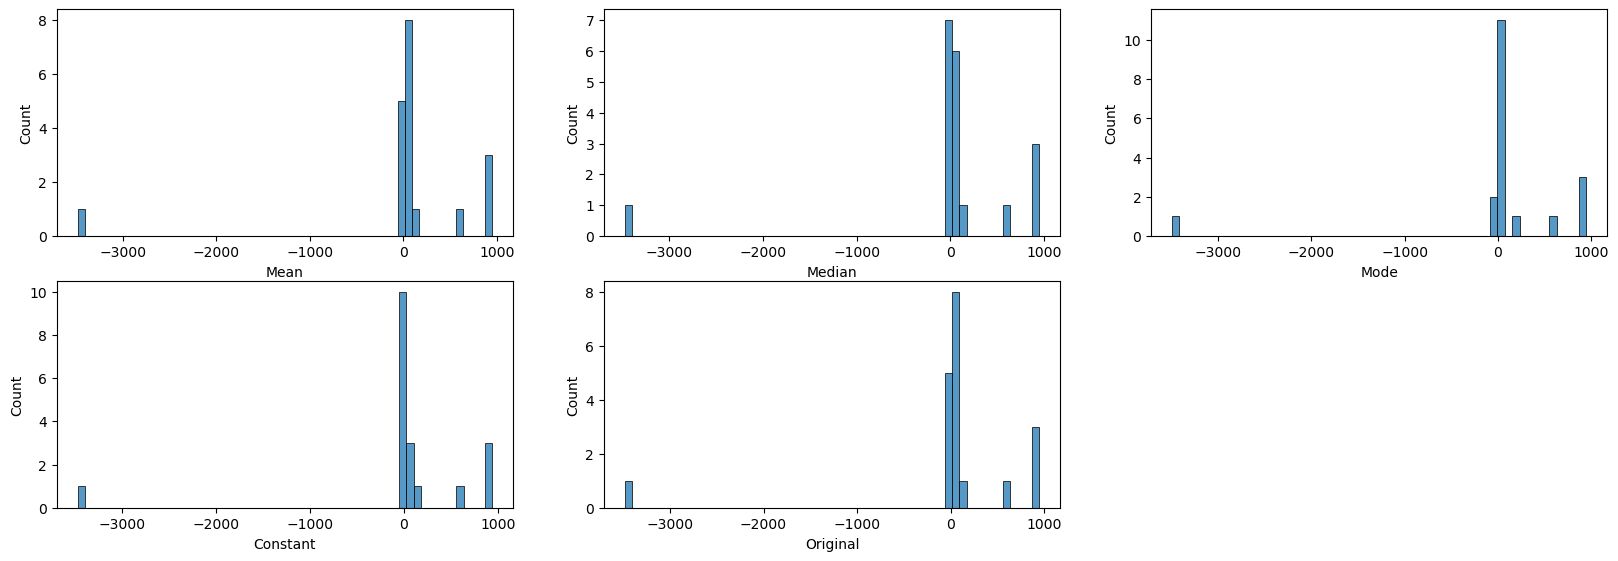

In [88]:
plt.figure(figsize=(20,10))
plt.subplot(331)
ax1 = sns.histplot(meanImputerData.mean())
ax1.set(xlabel='Mean')
plt.subplot(332)
ax2 = sns.histplot(medianImputerData.mean())
ax2.set(xlabel='Median')
plt.subplot(333)
ax3 = sns.histplot(mostFrequentImputerData.mean())
ax3.set(xlabel='Mode')
plt.subplot(334)
ax4 = sns.histplot(constantImputerData.mean())
ax4.set(xlabel='Constant')
plt.subplot(335)
ax5 = sns.histplot(df5.mean())
ax5.set(xlabel='Original')
plt.plot()
plt.show()